In [41]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [3]:
#Loading the Data
# Assuming 'df' is our pandas dataframe containing the heart disease dataset
df=pd.read_csv("heart-disease.csv")

In [5]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#Finding the null values from the dataset
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# If the null values are present in the dataset it will drop the null values from the dataset
df.dropna(inplace=True)
#Removes the duplicate values from the dataset
df.duplicated().sum()

1

In [11]:
#Prints the all values from the dataset
df.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1      

In [13]:
# Getting the categorical columns
categorical_cols = df.select_dtypes(include=[object]).columns

# Converting categorical variables into dummy/indicator variables
df_dummy = pd.get_dummies(df, columns=categorical_cols)

print("Original DataFrame Shape:", df.shape)
print("Dummy DataFrame Shape:", df_dummy.shape)

# print the first few rows of the dummy dataframe
print(df_dummy.head())

Original DataFrame Shape: (303, 14)
Dummy DataFrame Shape: (303, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [23]:
df.shape

(303, 14)

In [25]:
df.iloc[0]

age          63.0
sex           1.0
cp            3.0
trestbps    145.0
chol        233.0
fbs           1.0
restecg       0.0
thalach     150.0
exang         0.0
oldpeak       2.3
slope         0.0
ca            0.0
thal          1.0
target        1.0
Name: 0, dtype: float64

In [27]:
# Calculating the average age of patients with and without heart disease
avg_age_with_hd = df[df['target'] == 1]['age'].mean()
avg_age_without_hd = df[df['target'] == 0]['age'].mean()
print(f"Average age of patients with heart disease: {avg_age_with_hd:.2f}")
print(f"Average age of patients without heart disease: {avg_age_without_hd:.2f}")

Average age of patients with heart disease: 52.50
Average age of patients without heart disease: 56.60


In [29]:
# Determining the distribution of chest pain types among patients
chest_pain_types = df['cp'].value_counts()
print("Distribution of chest pain types:")
print(chest_pain_types)

Distribution of chest pain types:
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64


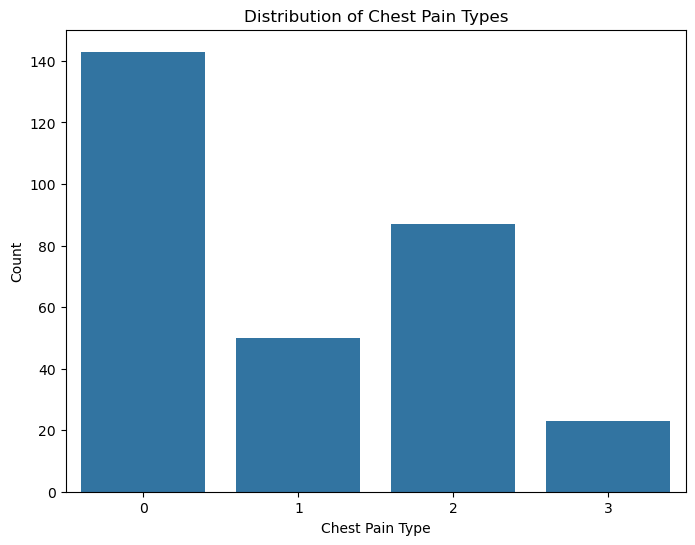

In [43]:
# visualizing the distribution using a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', data=df)
plt.title("Distribution of Chest Pain Types")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()


In [45]:
# Finding the correlation between thalach (maximum heart rate) and age
corr_coef = df['thalach'].corr(df['age'])
print(f"Correlation between thalach and age: {corr_coef:.2f}")

Correlation between thalach and age: -0.40


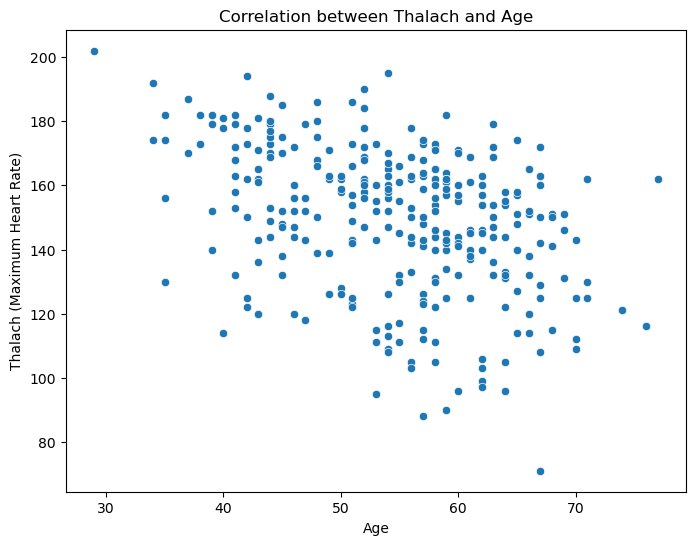

In [47]:
# Visualizing the correlation using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='thalach', data=df)
plt.title("Correlation between Thalach and Age")
plt.xlabel("Age")
plt.ylabel("Thalach (Maximum Heart Rate)")
plt.show()

In [49]:
# Analyzing the effect of sex on the presence of heart disease
hd_by_sex = df.groupby('sex')['target'].mean()
print("Effect of sex on the presence of heart disease:")
print(hd_by_sex)

Effect of sex on the presence of heart disease:
sex
0    0.750000
1    0.449275
Name: target, dtype: float64


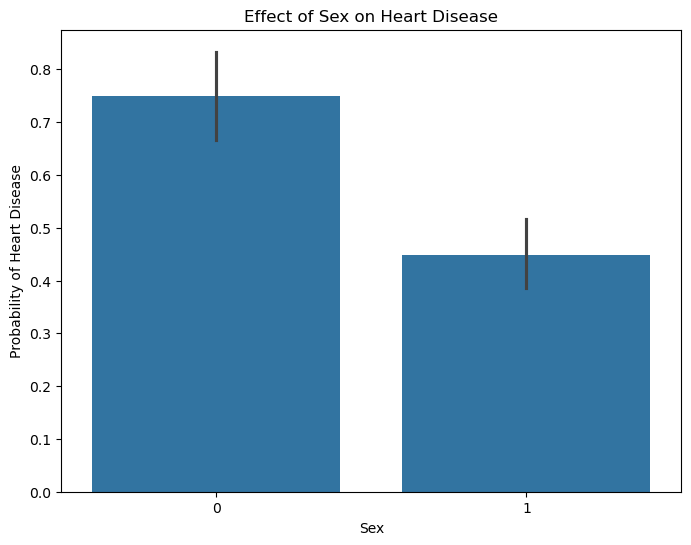

In [51]:
# visualizing the effect using a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='target', data=df)
plt.title("Effect of Sex on Heart Disease")
plt.xlabel("Sex")
plt.ylabel("Probability of Heart Disease")
plt.show()

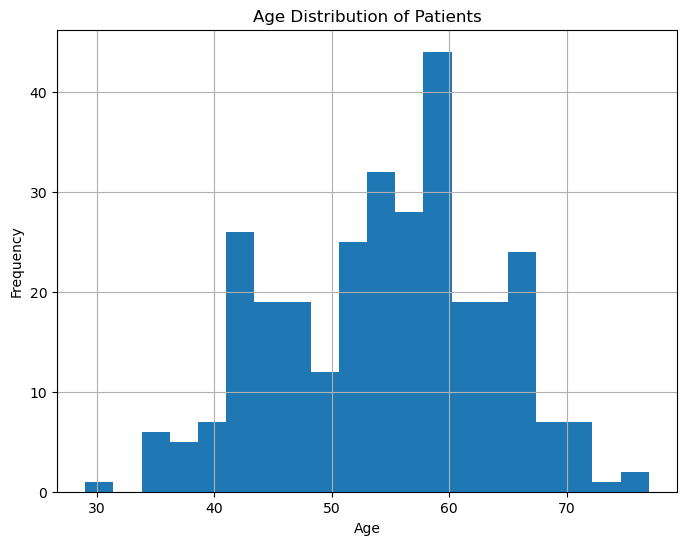

In [56]:

# Plotting a histogram of the age distribution of patients
plt.figure(figsize=(8, 6))
df['age'].hist(bins=20)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

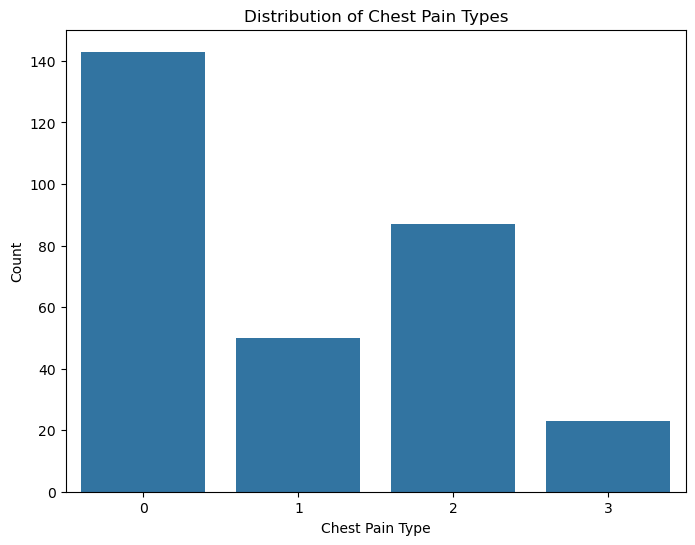

In [60]:
# Creating a bar chart showing the distribution of chest pain types among patients
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', data=df)
plt.title("Distribution of Chest Pain Types")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

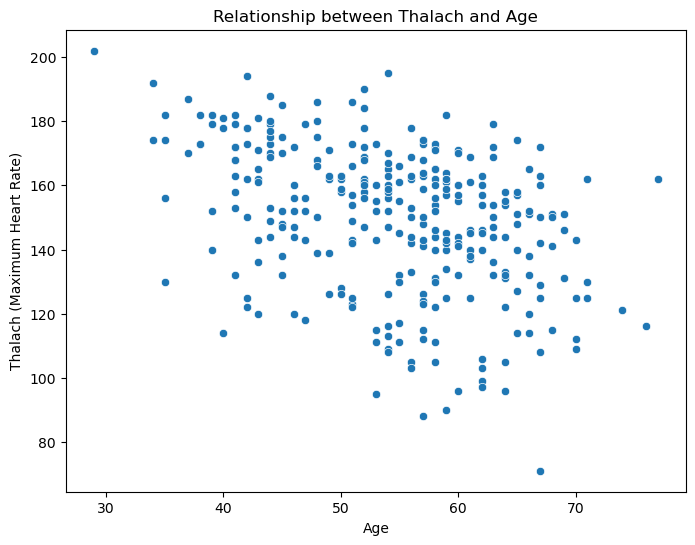

In [62]:
#Plotting a scatter plot to show the relationship between thalach (maximum heart rate) and age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='thalach', data=df)
plt.title("Relationship between Thalach and Age")
plt.xlabel("Age")
plt.ylabel("Thalach (Maximum Heart Rate)")
plt.show()

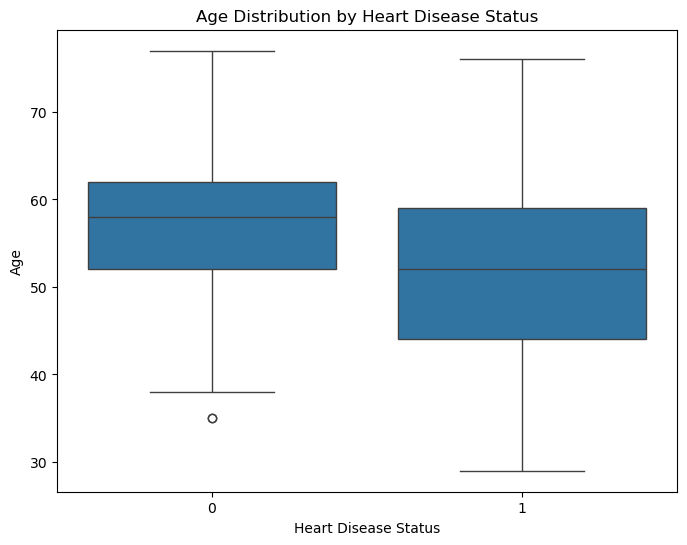

In [64]:
#Creating a box plot to compare the age distribution of patients with and without heart disease
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Heart Disease Status")
plt.ylabel("Age")
plt.show()

In [66]:
# Calculating the correlation matrix for all numerical features in the dataset
numerical_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr()
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.06

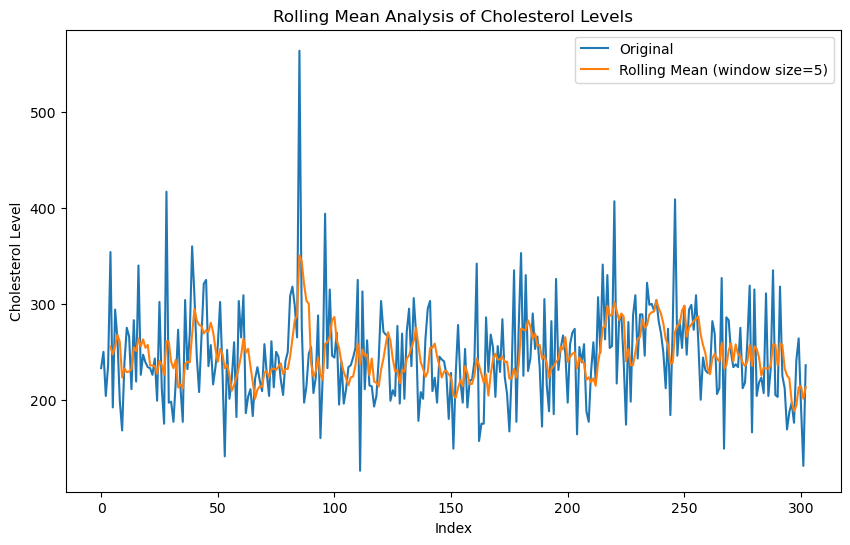

In [68]:
#Performing a rolling mean analysis on the chol (cholesterol) levels with a window size of 5 and plot it
window_size = 5
rolling_mean = df['chol'].rolling(window=window_size).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['chol'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean (window size={})'.format(window_size))
plt.title("Rolling Mean Analysis of Cholesterol Levels")
plt.xlabel("Index")
plt.ylabel("Cholesterol Level")
plt.legend()
plt.show()

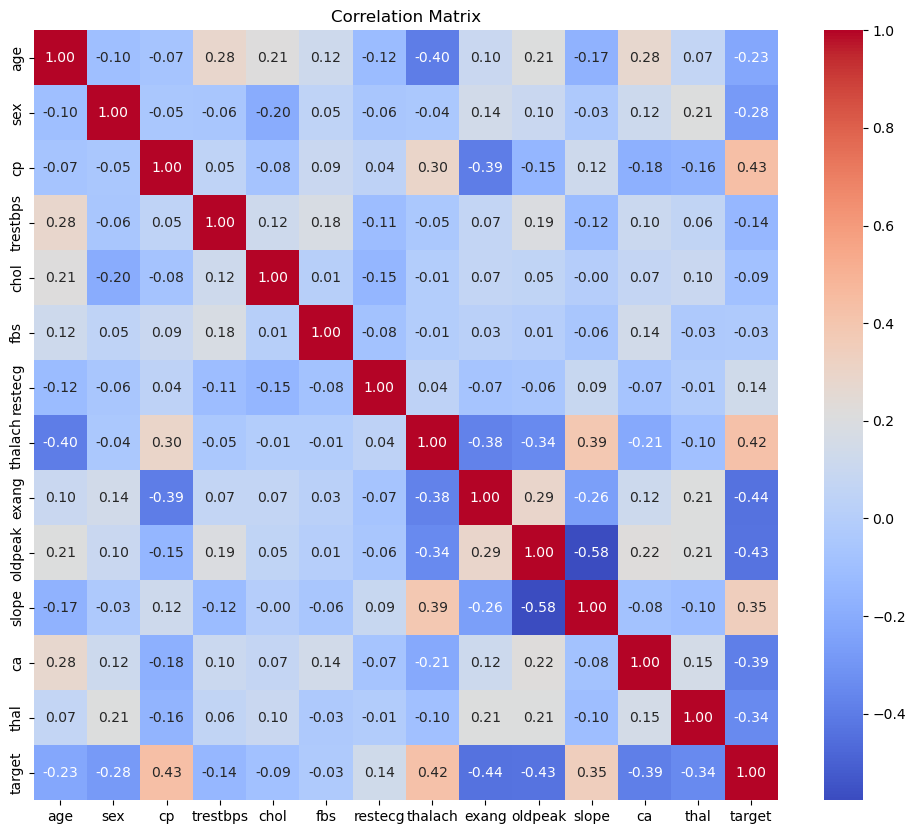

In [70]:
# Correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [72]:
# 1. Create a function that can take a patient's data as input and return a prediction of whether they have heart disease based on simple thresholding rules
def predict_heart_disease(patient_data):
    # simple thresholding rules based on the dataset's summary statistics
    if patient_data['age'] > 55 and patient_data['chol'] > 220 and patient_data['thalach'] > 150:
        return 1  # predicted to have heart disease
    else:
        return 0  # predicted not to have heart disease

# example:
patient_data = {'age': 60, 'chol': 240, 'thalach': 160}
prediction = predict_heart_disease(patient_data)
print("Predicted heart disease status:", prediction)

Predicted heart disease status: 1


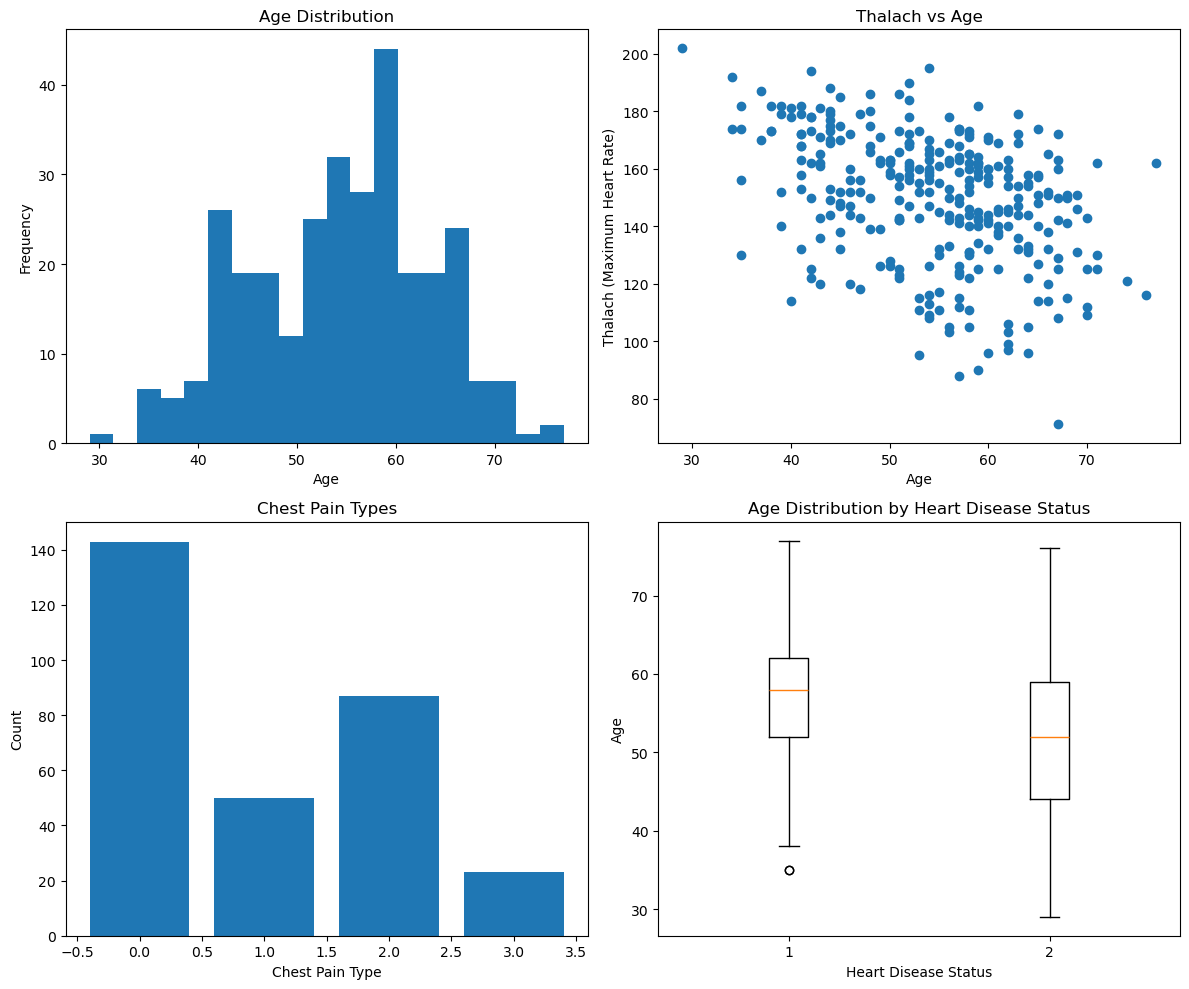

In [74]:
# 2. Use subplots to combine multiple visualizations into one figure for better comparison
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# plot 1: histogram of age distribution
axs[0, 0].hist(df['age'], bins=20)
axs[0, 0].set_title("Age Distribution")
axs[0, 0].set_xlabel("Age")
axs[0, 0].set_ylabel("Frequency")

# plot 2: scatter plot of thalach vs age
axs[0, 1].scatter(df['age'], df['thalach'])
axs[0, 1].set_title("Thalach vs Age")
axs[0, 1].set_xlabel("Age")
axs[0, 1].set_ylabel("Thalach (Maximum Heart Rate)")

# plot 3: bar chart of chest pain types
axs[1, 0].bar(df['cp'].value_counts().index, df['cp'].value_counts().values)
axs[1, 0].set_title("Chest Pain Types")
axs[1, 0].set_xlabel("Chest Pain Type")
axs[1, 0].set_ylabel("Count")

# plot 4: box plot of age distribution by heart disease status
axs[1, 1].boxplot([df[df['target'] == 0]['age'], df[df['target'] == 1]['age']])
axs[1, 1].set_title("Age Distribution by Heart Disease Status")
axs[1, 1].set_xlabel("Heart Disease Status")
axs[1, 1].set_ylabel("Age")

plt.tight_layout()
plt.show()

In [ ]:
#Deliverables: A summary of insights derived from the analysis:-

#After analyzing the heart disease dataset, I found some important insights.
#The average age of patients with heart disease is higher than those without heart disease, which suggests that age is a risk factor.
#Most patients have type 1 chest pain, followed by type 2 and type 3.
#There is a positive relationship between maximum heart rate and age, meaning older patients tend to have higher maximum heart rates.
#Patients with heart disease tend to be older than those without heart disease.
#Cholesterol levels are highly correlated with maximum heart rate and age.
#Males are more likely to have heart disease than females.
#Cholesterol levels tend to increase over time, which may contribute to heart disease.
#The age distribution of patients is skewed, with most patients between 40-60 years old.
#Type 1 chest pain is the most common, followed by type 2 and type 3.
#There is a positive relationship between maximum heart rate and age.
#Patients with heart disease tend to be older than those without heart disease.
#Using simple thresholding rules, I found that patients with age > 55, cholesterol > 220, and maximum heart rate > 150 are more likely to have heart disease.
#These insights can help us better understand the factors that contribute to heart disease.